<a href="https://colab.research.google.com/github/MorawoLekanDavid/ML_projects/blob/main/practiceNote/unsuperviseLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### PDF Examples
### Dated 19/11/24

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
X,y = make_blobs(n_samples = 100, n_features = 2, centers = 5, random_state=42)

In [ ]:
k = 5
Kmeans = KMeans(n_clusters=k,random_state=42)
y_pred = Kmeans.fit_predict(X)
y_pred

array([1, 4, 0, 4, 3, 1, 2, 2, 2, 0, 0, 1, 4, 0, 2, 3, 4, 4, 1, 3, 3, 2,
       0, 1, 3, 3, 4, 4, 4, 2, 1, 3, 4, 4, 4, 3, 0, 0, 0, 2, 1, 2, 2, 2,
       3, 0, 0, 1, 3, 4, 4, 2, 2, 1, 2, 3, 4, 4, 0, 0, 2, 0, 3, 1, 3, 1,
       4, 4, 1, 4, 3, 1, 1, 1, 4, 3, 2, 3, 4, 1, 4, 1, 3, 2, 3, 0, 3, 0,
       0, 0, 3, 0, 1, 2, 1, 0, 1, 0, 2, 2], dtype=int32)

In [ ]:
Kmeans.cluster_centers_

array([[-2.87559086,  8.66758942],
       [-6.88732163, -6.84846391],
       [ 4.73987759,  2.0192694 ],
       [-8.97484095,  7.55134937],
       [ 1.90144007,  4.22597687]])

In [ ]:
Kmeans.inertia_

159.83755106823406

In [ ]:
### The best way to measure the result of the n_cluster
from sklearn.metrics import silhouette_score,silhouette_samples
silhouette_avg = silhouette_score(X,Kmeans.labels_)

In [ ]:
sample_silhouette_values = silhouette_samples(X,Kmeans.labels_)

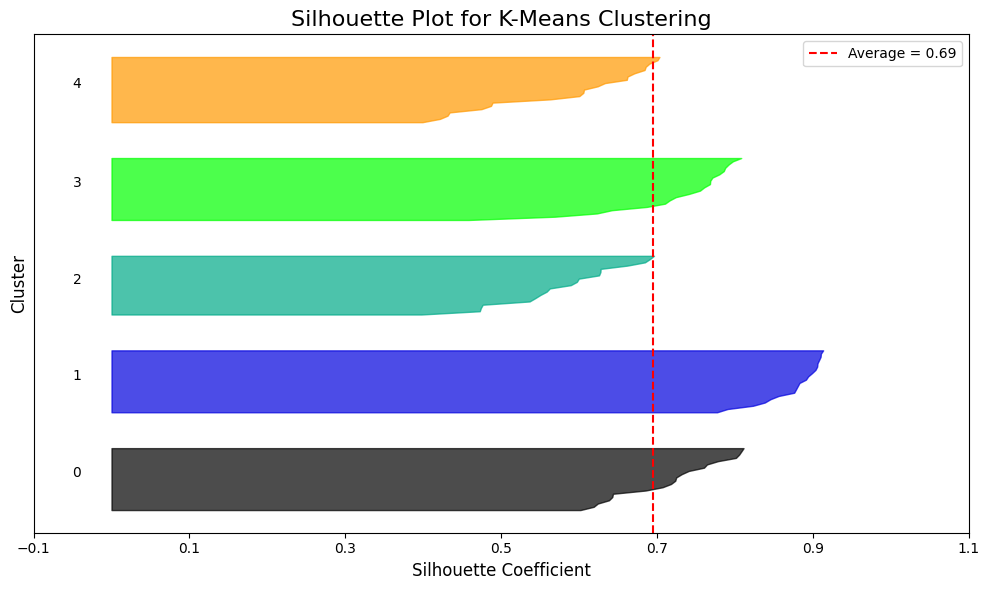

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Step 4: Plot the silhouette diagram
fig, ax = plt.subplots(figsize=(10, 6))

y_lower = 10
for i in range(k):
    # Aggregate silhouette scores for the cluster
    ith_cluster_silhouette_values = sample_silhouette_values[Kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Fill the silhouette plot with the cluster's scores
    color = plt.cm.nipy_spectral(float(i) / k)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7
    )

    # Label the silhouette plots with their cluster numbers
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Add space between plots

# Step 5: Format the plot
ax.set_title("Silhouette Plot for K-Means Clustering", fontsize=16)
ax.set_xlabel("Silhouette Coefficient", fontsize=12)
ax.set_ylabel("Cluster", fontsize=12)

# Vertical line for average silhouette score
ax.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Average = {silhouette_avg:.2f}")
ax.legend()

ax.set_yticks([])  # Remove y-axis labels
ax.set_xticks(np.arange(-0.1, 1.1, 0.2))
plt.tight_layout()
plt.show()


In [ ]:
## The above code is for a specified n of clusters denoted as k i.e k =5

For n_clusters = 2, the average silhouette score is 0.59


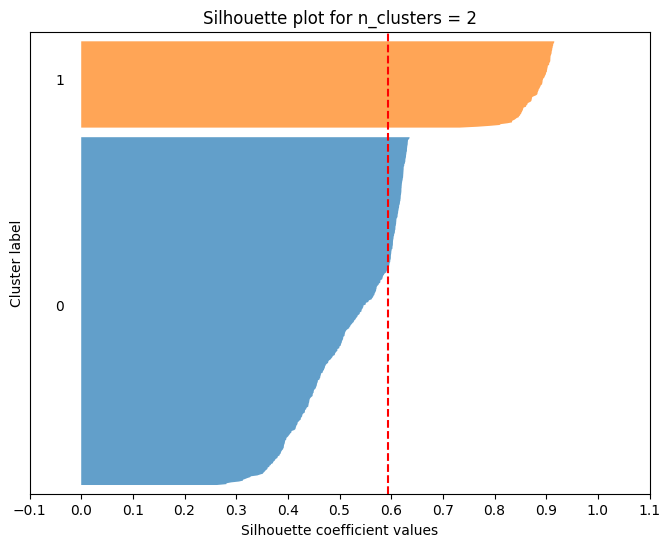

For n_clusters = 3, the average silhouette score is 0.71


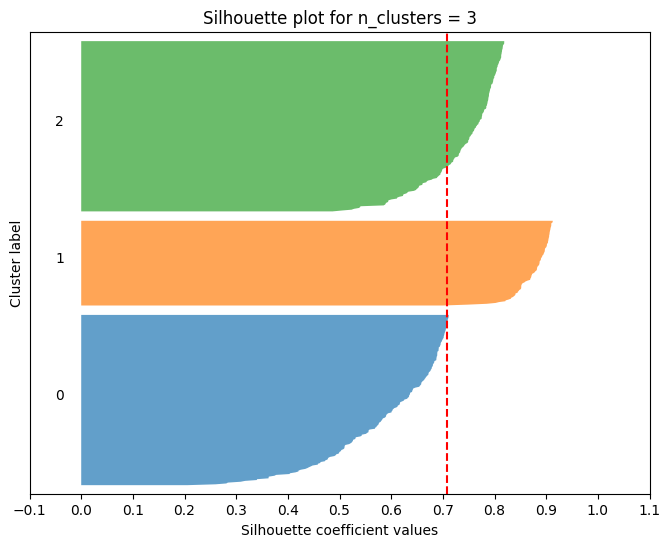

For n_clusters = 4, the average silhouette score is 0.73


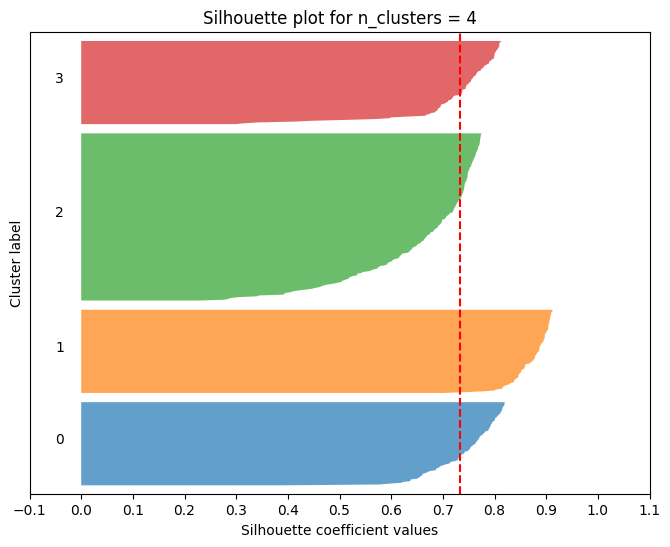

For n_clusters = 5, the average silhouette score is 0.68


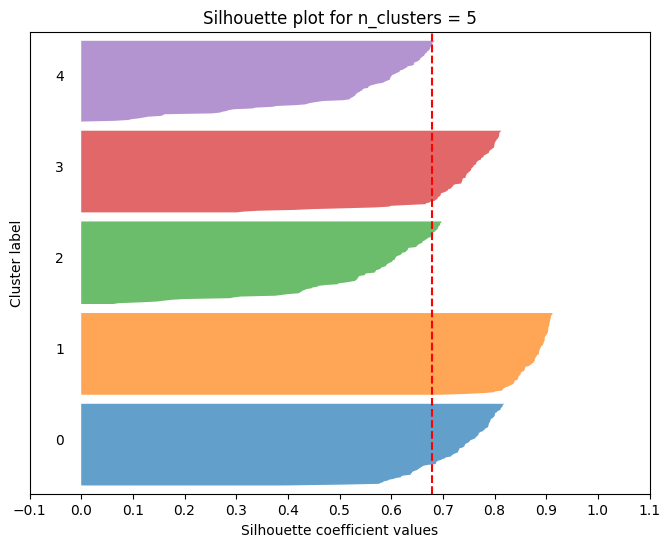

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
X, y = make_blobs(n_samples=500, centers=5,random_state=42)

# Range of clusters to evaluate
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot for the silhouette plot
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 6)

    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg:.2f}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Set up the plot
    y_lower = 10
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    ax1.set_title(f"Silhouette plot for n_clusters = {n_clusters}")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Plot silhouette scores for each cluster
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0, ith_cluster_silhouette_values,
            alpha=0.7
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # Adjust y_lower for the next cluster

    # Draw the average silhouette score as a dashed line
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.1))

    plt.show()


In [ ]:
#Note that Kmeans as limitation

**Image Segmentation**

In [ ]:
import PIL
filepath = '/content/nexaura-66.jpg'
image = np.asarray(PIL.Image.open(filepath))
image

array([[[ 3, 16, 24],
        [ 5, 15, 24],
        [ 6, 16, 25],
        ...,
        [ 1, 10, 15],
        [ 1, 10, 15],
        [ 1, 10, 15]],

       [[ 3, 16, 24],
        [ 5, 15, 24],
        [ 6, 16, 25],
        ...,
        [ 1, 10, 15],
        [ 1, 10, 15],
        [ 1, 10, 15]],

       [[ 3, 16, 24],
        [ 5, 15, 24],
        [ 6, 16, 25],
        ...,
        [ 2, 11, 16],
        [ 2, 11, 16],
        [ 2, 11, 16]],

       ...,

       [[35, 24, 28],
        [33, 22, 26],
        [43, 34, 37],
        ...,
        [15, 20, 24],
        [15, 20, 24],
        [15, 20, 24]],

       [[37, 26, 30],
        [32, 21, 25],
        [39, 30, 33],
        ...,
        [13, 18, 22],
        [14, 19, 23],
        [14, 19, 23]],

       [[45, 34, 38],
        [35, 24, 28],
        [37, 28, 31],
        ...,
        [12, 17, 21],
        [12, 17, 21],
        [13, 18, 22]]], dtype=uint8)

In [ ]:
image.shape
### the first dimension in the output is height, the second is the width and the last is the number of color channel

(5175, 3456, 3)

In [ ]:
X = image.reshape(-1,3)

In [ ]:
X

array([[ 3, 16, 24],
       [ 5, 15, 24],
       [ 6, 16, 25],
       ...,
       [12, 17, 21],
       [12, 17, 21],
       [13, 18, 22]], dtype=uint8)

In [ ]:
kmeans = KMeans(n_clusters = 8, random_state = 42)
kmeans.fit(X)

KMeans(random_state=42)

In [ ]:
seg_image = kmeans.cluster_centers_[kmeans.labels_]
seg_image.reshape(image.shape)

array([[[ 8.99717209, 15.51805452, 22.321082  ],
        [ 8.99717209, 15.51805452, 22.321082  ],
        [ 8.99717209, 15.51805452, 22.321082  ],
        ...,
        [ 8.99717209, 15.51805452, 22.321082  ],
        [ 8.99717209, 15.51805452, 22.321082  ],
        [ 8.99717209, 15.51805452, 22.321082  ]],

       [[ 8.99717209, 15.51805452, 22.321082  ],
        [ 8.99717209, 15.51805452, 22.321082  ],
        [ 8.99717209, 15.51805452, 22.321082  ],
        ...,
        [ 8.99717209, 15.51805452, 22.321082  ],
        [ 8.99717209, 15.51805452, 22.321082  ],
        [ 8.99717209, 15.51805452, 22.321082  ]],

       [[ 8.99717209, 15.51805452, 22.321082  ],
        [ 8.99717209, 15.51805452, 22.321082  ],
        [ 8.99717209, 15.51805452, 22.321082  ],
        ...,
        [ 8.99717209, 15.51805452, 22.321082  ],
        [ 8.99717209, 15.51805452, 22.321082  ],
        [ 8.99717209, 15.51805452, 22.321082  ]],

       ...,

       [[26.34798202, 22.2532164 , 29.12611542],
        [26

In [ ]:
from PIL import Image

# Save the image as a file
segmented_image_uint8 = seg_image.astype(np.uint8)
Image.fromarray(segmented_image_uint8).save("segmented_image.png")


**DBSCAN(Density-Based Spatial CLustering Application with Noise)**

DBSCAN algorithm defines clusters as a continuous regions of high density
*The key the terms in the dbscan are as follows*:
- Core instances or points: It's a point that has at least min_sample instances in it neighborhood called Epsilion.They are located in the dense region
- Epsilion: is known as the neighbourhood of the core_point. it's a small distance from the core-point
- All instances in the neighborhood of a core instance belong to the same cluster.
This neighborhood may include other core instances; therefore, a long sequence
of neighboring core instances forms a single cluster
- Noise or Anomaly: This are points that are not in the clusters
you set the min_smaples in the neighborhood


In [3]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 1000, noise = 0.05)
dbscan = DBSCAN(eps = 0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [4]:
dbscan.labels_
#Note that the negative 1 in the label means that the point is an anomaly or noise

array([ 1,  0, -1, -1,  4,  1,  2,  3,  1, 10,  4,  7,  1,  2,  1,  1,  3,
        5,  1, -1,  5,  4,  5,  0,  1,  1,  6,  2, -1,  2,  6,  7,  3,  1,
        6,  4,  1,  2,  1,  1,  7,  4,  1,  5,  4,  1,  7,  5,  5,  4,  1,
        2,  2,  2,  5,  4,  2,  7,  2, -1,  4,  1,  1,  4,  1,  5,  5,  7,
        1,  2,  5,  2,  4,  5,  4,  7,  2,  0,  5,  5,  5,  5,  1,  1,  4,
        2,  2, -1, -1,  7,  1,  7,  5,  1,  5,  1,  5,  2,  1,  0,  0,  2,
        1,  1,  2,  2,  6,  4,  0,  6,  5,  8,  6,  1,  1,  5,  4,  4,  1,
        1,  5,  1,  3,  6,  0, -1,  1,  5,  4,  1,  1,  7,  1,  2, -1,  3,
       -1,  0,  1,  7,  1,  4,  1,  2,  4,  5,  2,  6,  5,  7,  7,  1,  2,
        7,  2,  2,  3,  5,  4,  1,  2,  5,  1,  2,  4,  2,  1,  5,  2,  5,
        2,  7,  1,  4,  1,  2,  5,  1,  2,  1, -1,  4,  0,  7,  2,  4,  5,
        4,  0,  2,  4,  4,  8,  4,  5,  6,  0,  5,  4,  5,  0,  1,  0,  1,
        6, -1,  2,  4, -1,  4,  0,  7,  1,  5,  1,  4,  6,  0,  0,  3,  6,
        0, -1,  6,  4,  0

In [5]:
# the core instances are available in the component_ variable
dbscan.components_

array([[ 1.45144438, -0.38964115],
       [ 0.07851807,  0.01787242],
       [ 1.97782144,  0.38695666],
       ...,
       [ 0.73418976,  0.65012268],
       [-0.71241567,  0.71181072],
       [-0.60322233,  0.86870803]])

In [6]:
## As much as DBSCAN is robust to outlier. it has just two hyperparameter(eps, min_samples)..
#If the density varies significantly across
#the clusters, however, or if there’s no sufficiently low-density region around some
#clusters, DBSCAN can struggle to capture all the clusters properly. Moreover, its
#computational complexity is roughly O(m2n), so it does not scale well to large
#datasets.


In [8]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 3, n_init =10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [10]:
gm.weights_

array([0.58527295, 0.20722184, 0.20750522])

In [11]:
gm.means_

array([[ 0.50032121,  0.24735369],
       [-0.74049466,  0.56451095],
       [ 1.73807487, -0.06188326]])

In [12]:
gm.covariances_

array([[[ 0.16596545, -0.09665009],
        [-0.09665009,  0.28766969]],

       [[ 0.05609579,  0.0618037 ],
        [ 0.0618037 ,  0.08427074]],

       [[ 0.05656706,  0.06559291],
        [ 0.06559291,  0.0907535 ]]])

In [15]:
gm.converged_

True

In [17]:
gm.n_iter_

15

In [18]:
gm.predict(X)

array([0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 2, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0,
       0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 2, 0,
       2, 2, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 2, 2, 0, 1, 2, 1, 0, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 0, 1, 2, 1,
       1, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0,

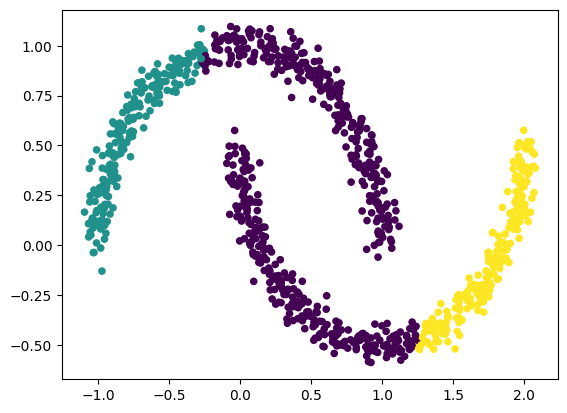

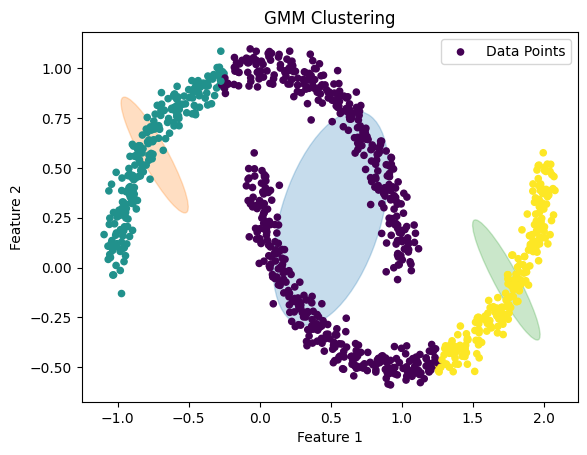

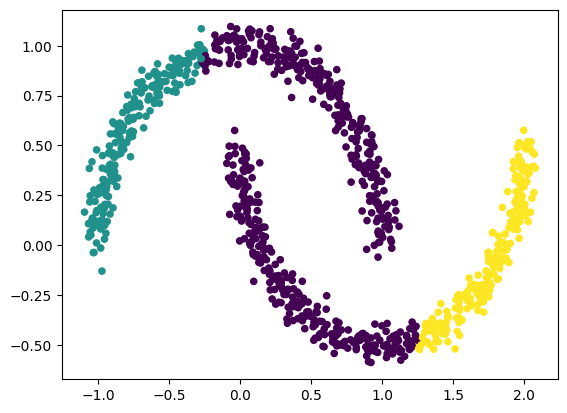

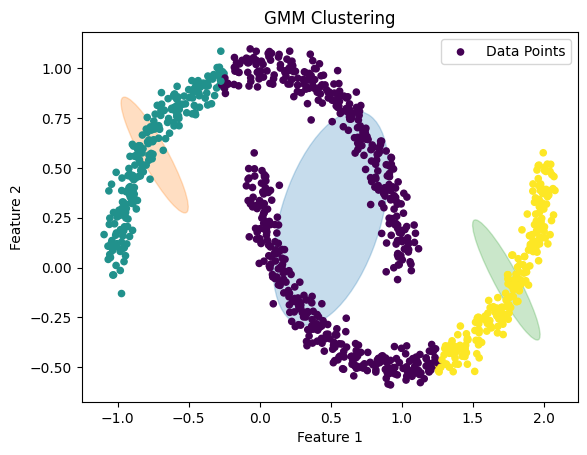

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Predict cluster labels
labels = gm.predict(X)

# Plot data points with cluster labels
plt.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis', marker='o', label='Data Points')

# Plot the GMM ellipses (covariance)
def plot_gmm_ellipses(gmm, ax):
    for i, (mean, cov) in enumerate(zip(gmm.means_, gmm.covariances_)):
        if cov.ndim == 1:  # Diagonal covariances
            cov = np.diag(cov)
        eigenvalues, eigenvectors = np.linalg.eigh(cov)
        order = eigenvalues.argsort()[::-1]
        eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
        angle = np.arctan2(eigenvectors[0, 1], eigenvectors[0, 0])
        angle = np.degrees(angle)
        width, height = 2 * np.sqrt(eigenvalues)  # Scale for visualization
        ellipse = Ellipse(mean, width, height, angle=angle, alpha=0.25, color=f'C{i}')
        ax.add_patch(ellipse)

fig, ax = plt.subplots()
plot_gmm_ellipses(gm, ax)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis', label='Data Points')
plt.title("GMM Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
